# Fake News Detection using Recurrent Neural Networks (RNNs) and Convolutional Neural Networks (CNNs)

## Project Description

This project aims to tackle the critical problem of Fake News Detection using RNN and CNN deep learning techniques. With the proliferation of misinformation in the digital age, distinguishing between factual and fabricated news has become extremely important.Our goal in this project is to achive the following:
 - Create a robust deep learning model to classify a news piece where its a fake or not.
    - Compare different models and see how they work. For this we will try both RNN and CNN deep learning techniques.
    - See which technique is better in terms of training speed and accuracy.
 - Finaly create a Fake news detector function using the best approach discovered in previous step.



## Dataset

We will utilize the ["Fake and Real News Dataset" from Kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset), which comprises a collection of news articles 44,898 articles from May 1, 2015 - Dec 12, 2017 meticulously labeled as either "real" (21417 artcles) or "fake" (23481 artcles) providing a robust foundation for our classification task.



## What Problem we are solving?
The core problem we are solving is creating a Fake News Detection system using deep learning which performs better than traditional machine learning approcahes.

In an era of rampant misinformation, distinguishing credible news from deliberately fabricated content is crucial for informed public discourse and maintaining societal trust. Traditional methods often rely on hand-crafted features (e.g., TF-IDF, N-grams, statistical lexical features like word count or readability scores) which require extensive domain expertise and can struggle to capture the subtle, high-level semantic patterns and contextual nuances present in human language. Deep learning models, particularly Recurrent Neural Networks (RNNs) and Convolutional Neural Networks (CNNs), address this by automatically learning hierarchical and abstract features directly from the raw text through mechanisms like word embeddings. This ability to capture complex linguistic dependencies, sarcasm, emotional tone, and stylistic inconsistencies, without explicit feature engineering, allows deep learning models to achieve superior performance in discerning the intricate linguistic cues that differentiate genuine news from deceptive content, often outperforming traditional methods in accuracy and adaptability to new forms of misinformation.

## RNN vs CNN deep learning models

- CNNs use "convolutional filters" (small matrices of weights) that slide over the input data (e.g., pixels in an image, or word embeddings in text). These filters detect local patterns (e.g., edges, textures in images; n-grams, phrases in text) regardless of their position in the input.

- RNNs on other hand use a "memory" (a hidden state) that carries information from one step in the sequence to the next. The output at a given time step is influenced by both the current input and the memory of previous inputs. This allows them to understand context and dependencies over time.

## Project Setup

In [57]:
# --- 1. Setup and Library Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already present
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ajaygupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Loading and Preprocess Data

Combining two separate csv for fake and true into one Dataframe and add a `label` feature (0 for fake and 1 for real).

Data Successfully Loaded
First 5 rows of the dataset:


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1



Dataset shape: (44898, 5)

Column names and data types:
title      object
text       object
subject    object
date       object
label       int64
dtype: object

Basic statistics for numeric columns:


,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000



Missing values per column:
title      0
text       0
subject    0
date       0
label      0
dtype: int64

Class distribution:
label
0    23481
1    21417
Name: count, dtype: int64
Duplicate rows removed.
New dataset shape: (44689, 5)
label
0    23478
1    21211
Name: count, dtype: int64


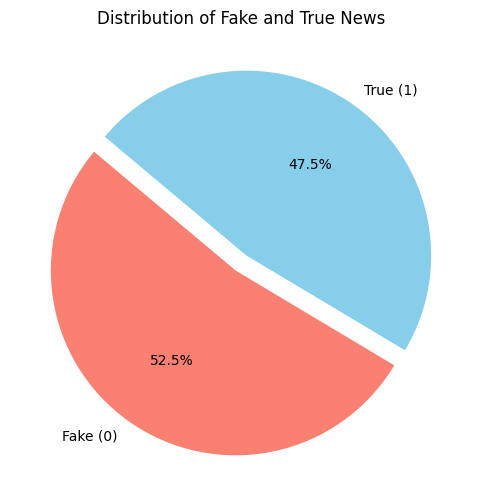

Oldest article date: 2015-05-01 00:00:00
Newest article date: 2017-12-31 00:00:00


In [58]:
# Load the datasets
fake_df = pd.read_csv('../data/Fake.csv')
true_df = pd.read_csv('../data/True.csv')

# Add a label column: 0 for fake, 1 for true
fake_df['label'] = 0
true_df['label'] = 1

# Concatenate the datasets into one dataframe
df = pd.concat([fake_df, true_df], ignore_index=True)

# Shuffle the combined dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Data Successfully Loaded")

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Display the shape of the DataFrame
print(f"\nDataset shape: {df.shape}")

# Display column names and types
print("\nColumn names and data types:")
print(df.dtypes)

# Display basic statistics for numeric columns
print("\nBasic statistics for numeric columns:")
display(df.describe())

# Display number of missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

# Display the distribution of the 'label' column
print("\nClass distribution:")
print(df['label'].value_counts())


# Remove duplicate rows
df.drop_duplicates(inplace=True)

print("Duplicate rows removed.")
print(f"New dataset shape: {df.shape}")
print(df['label'].value_counts())

# Plot pie chart for label 0 and 1
label_counts = df['label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=['Fake (0)', 'True (1)'], autopct='%1.1f%%', colors=['salmon', 'skyblue'], startangle=140, explode=(0.05, 0.05))
plt.title('Distribution of Fake and True News')
plt.show()

# oldest and newest article date
df['parsed_date'] = pd.to_datetime(df['date'], errors='coerce')

oldest_date = df['parsed_date'].min()
newest_date = df['parsed_date'].max()

print(f"Oldest article date: {oldest_date}")
print(f"Newest article date: {newest_date}")


## In-depth EDA

Observations
 - Real news articles have less words on average than fake ones.
 - Most words in top 20 articles are associated with politics.

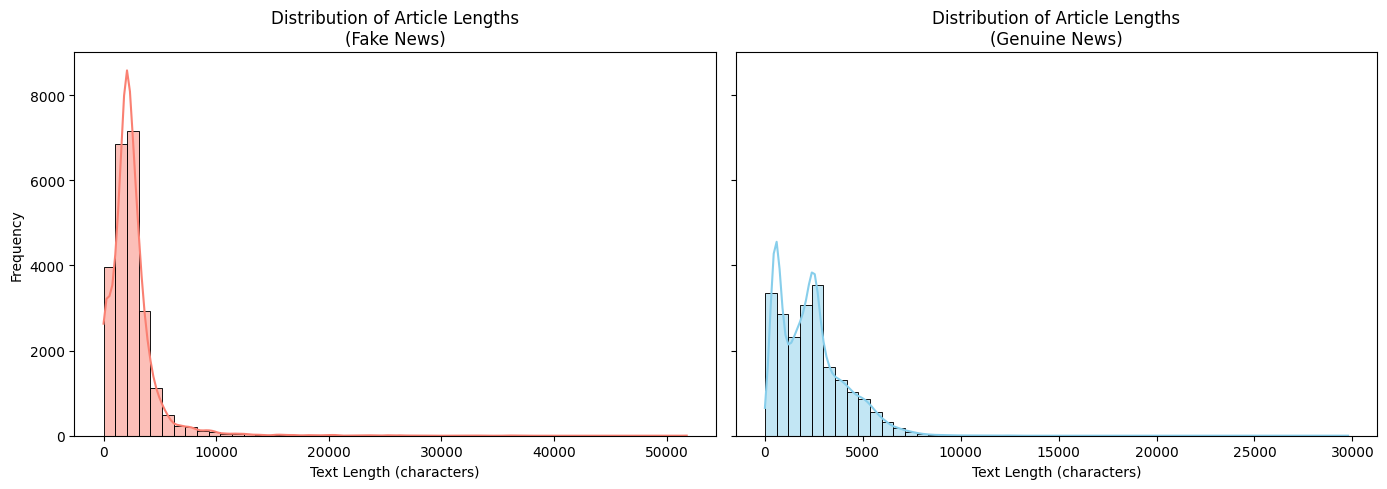

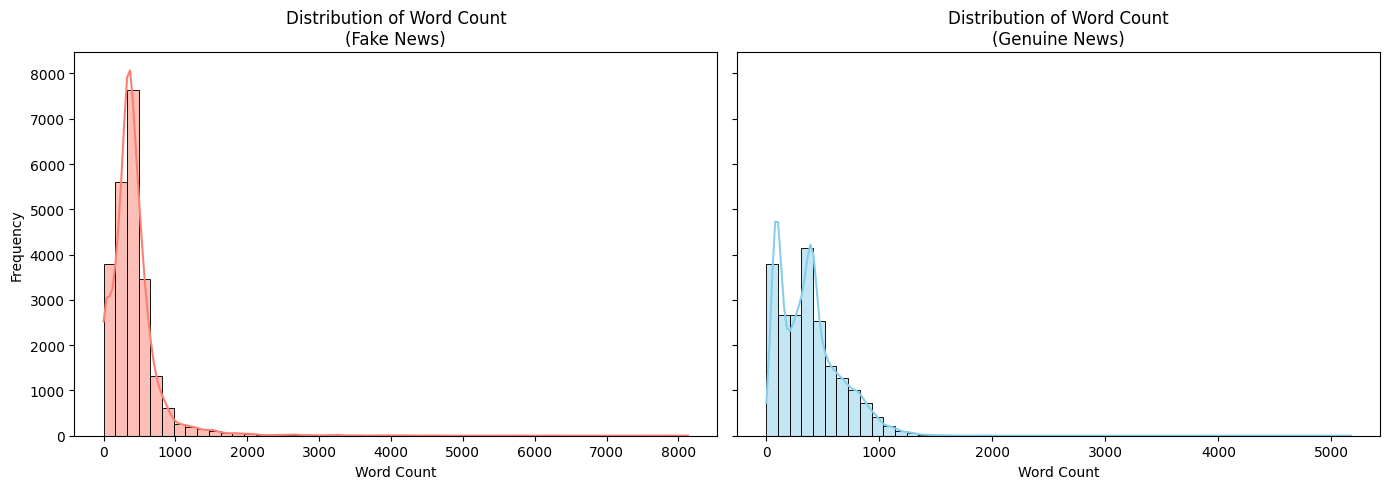

/var/folders/fk/00ns88w11d730txg0s1d70140000gn/T/ipykernel_5534/2318031034.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[w[0] for w in top_fake], x=[w[1] for w in top_fake], palette='Reds_r')
/var/folders/fk/00ns88w11d730txg0s1d70140000gn/T/ipykernel_5534/2318031034.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[w[0] for w in top_true], x=[w[1] for w in top_true], palette='Blues_r')


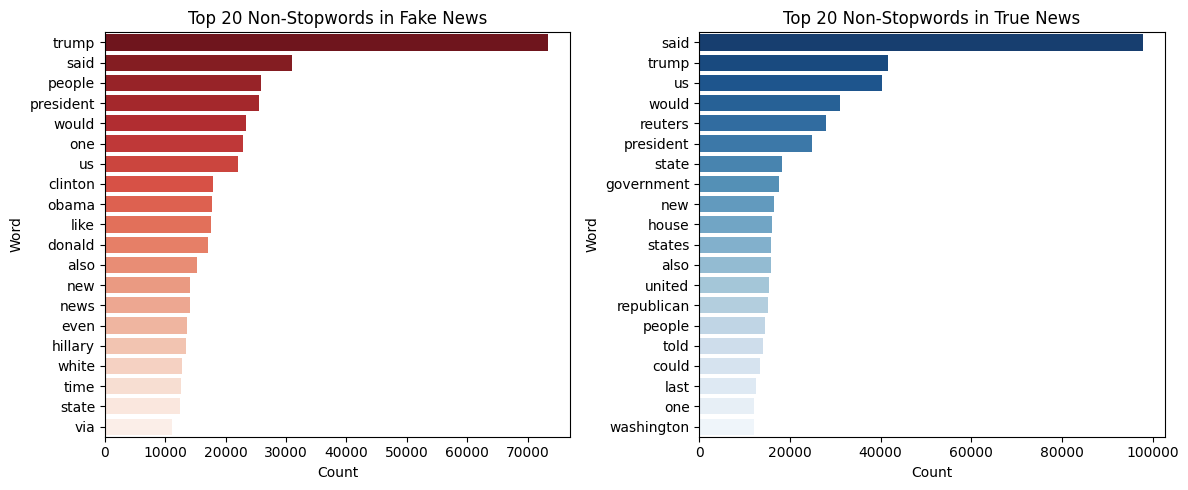

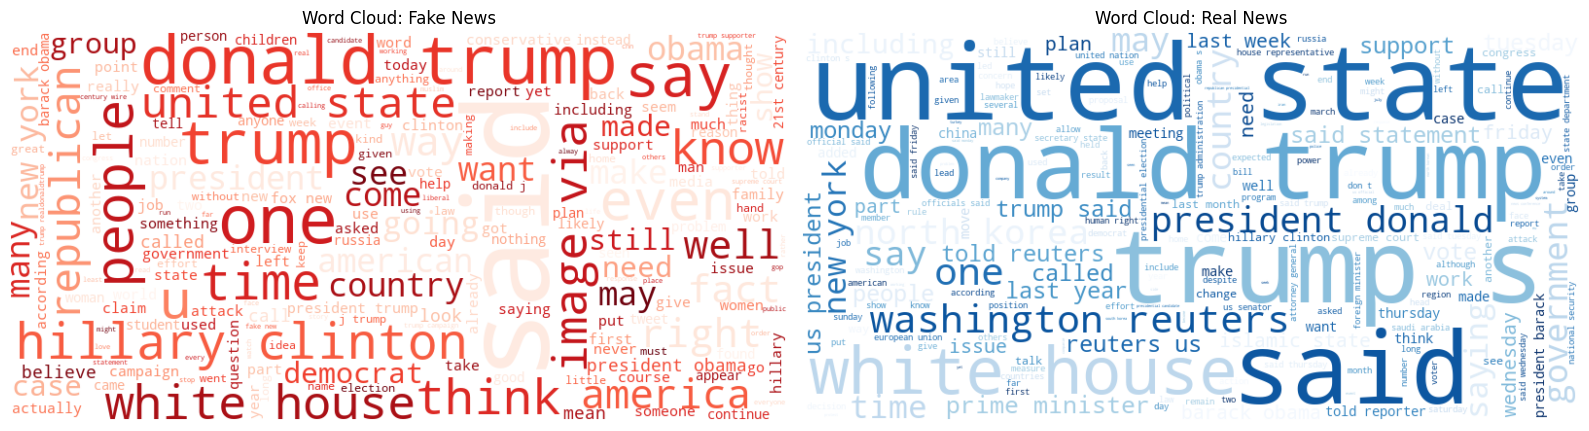

In [59]:
from wordcloud import WordCloud
from collections import Counter
import string


df['text_length'] = df['text'].astype(str).apply(len)

# Create side by side plots for each class
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

labels = {0: 'Fake News', 1: 'Genuine News'}
palette = {0: 'salmon', 1: 'skyblue'}

for idx, label in enumerate([0, 1]):
    subset = df[df['label'] == label]
    sns.histplot(
        subset['text_length'],
        bins=50,
        kde=True,
        color=palette[label],
        ax=axes[idx]
    )
    axes[idx].set_title(f'Distribution of Article Lengths\n({labels[label]})')
    axes[idx].set_xlabel('Text Length (characters)')
    axes[idx].set_ylabel('Frequency' if idx == 0 else '')

plt.tight_layout()
plt.show()


# Calculate word count for each article
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))

# Create side by side plots for word count distribution by class
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

for idx, label in enumerate([0, 1]):
    subset = df[df['label'] == label]
    sns.histplot(
        subset['word_count'],
        bins=50,
        kde=True,
        color=palette[label],
        ax=axes[idx]
    )
    axes[idx].set_title(f'Distribution of Word Count\n({labels[label]})')
    axes[idx].set_xlabel('Word Count')
    axes[idx].set_ylabel('Frequency' if idx == 0 else '')

plt.tight_layout()
plt.show()


stop_words = set(stopwords.words('english'))

def get_top_n_nonstopwords(texts, n=20):
    all_words = ' '.join(texts).lower()
    all_words = all_words.translate(str.maketrans('', '', string.punctuation))
    words = all_words.split()
    # Remove stopwords
    filtered_words = [w for w in words if w not in stop_words]
    return Counter(filtered_words).most_common(n)

top_fake = get_top_n_nonstopwords(df[df['label']==0]['text'], 20)
top_true = get_top_n_nonstopwords(df[df['label']==1]['text'], 20)

# Plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(y=[w[0] for w in top_fake], x=[w[1] for w in top_fake], palette='Reds_r')
plt.title('Top 20 Non-Stopwords in Fake News')
plt.xlabel('Count')
plt.ylabel('Word')

plt.subplot(1,2,2)
sns.barplot(y=[w[0] for w in top_true], x=[w[1] for w in top_true], palette='Blues_r')
plt.title('Top 20 Non-Stopwords in True News')
plt.xlabel('Count')
plt.ylabel('Word')

plt.tight_layout()
plt.show()

from wordcloud import WordCloud

# Generate and display word clouds for fake and real (true) news side by side

# Prepare text for fake and real news
fake_text = ' '.join(df[df['label'] == 0]['text']).lower()
real_text = ' '.join(df[df['label'] == 1]['text']).lower()

# Remove punctuation
fake_text = fake_text.translate(str.maketrans('', '', string.punctuation))
real_text = real_text.translate(str.maketrans('', '', string.punctuation))

# Remove stopwords
fake_words = [w for w in fake_text.split() if w not in stop_words]
real_words = [w for w in real_text.split() if w not in stop_words]

fake_text_clean = ' '.join(fake_words)
real_text_clean = ' '.join(real_words)

# Create word clouds
wc_fake = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(fake_text_clean)
wc_real = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(real_text_clean)

# Plot side by side for fake and real news
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].imshow(wc_fake, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud: Fake News')

axes[1].imshow(wc_real, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud: Real News')

plt.tight_layout()
plt.show()

# Data Cleaning

Date cleaning is most critical step in text classification. Before we tokenize our data to feed the ML model we need to clean it to remove unnessary words. This function will:
 - Lowercase text
 - Remove text in brackets, URLs, HTML tags, punctuation, newlines, and words with numbers, Remove extra spaces.
 - Remove stopwords using `NLTK` which explicitly loads a list of common English stopwords (e.g., "the", "is", "and", "a", "an", "of", "to"). This is crucial for English text, as these words are very frequent but often carry little semantic meaning for classification tasks.
 - Used `NLTK WordNetLemmatizer` for Lemmatization. A text preprocessing technique that reduces words to their base form (called a "lemma"), which chops off word endings to find the proper base form for a word through linguistic knowledge. For example: Running → run

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


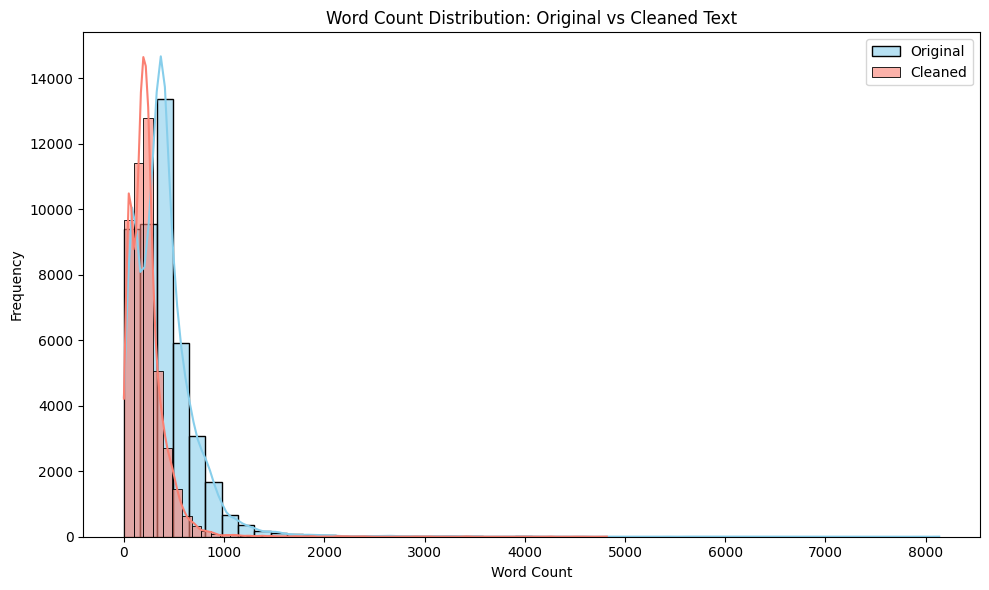

In [6]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

# Apply cleaning to the 'text' column
df['clean_text'] = df['text'].astype(str).apply(clean_text)


# Calculate word count for original and cleaned text
df['orig_word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))
df['clean_word_count'] = df['clean_text'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['orig_word_count'], bins=50, kde=True, color='skyblue', label='Original', alpha=0.6)
sns.histplot(df['clean_word_count'], bins=50, kde=True, color='salmon', label='Cleaned', alpha=0.6)
plt.title('Word Count Distribution: Original vs Cleaned Text')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

## Model Architecture

For this fake news detection project, we explore two distinct deep learning architectures: a Bidirectional Long Short-Term Memory (BiLSTM) model and a 1D Convolutional Neural Network (1D CNN) model. Both models are designed to process the numerical representations of our cleaned news text and classify them as either "real" (0) or "fake" (1). Both architectures begin with an Embedding Layer, which transforms word indices into dense, fixed-size vectors (embeddings), allowing words with similar meanings to have similar representations. Dropout Layers are strategically placed throughout the networks to prevent overfitting by randomly deactivating a fraction of neurons during training.

### 1. Bidirectional Long Short-Term Memory (BiLSTM) Model
It uses Bidirectional LSTM layers (with 64 and 32 units, respectively) to process the text both forwards and backwards. This enables the model to capture context and dependencies from both preceding and succeeding words, providing a comprehensive understanding of the sequence. After the LSTM layers and dropout, the model uses a Dense layer with ReLU activation and a final output Dense layer with sigmoid activation for binary classification. Model has following layers:

1. An Embedding Layer: It takes the integer-encoded words from our preprocessed text and maps them into dense, fixed-size vectors (embeddings) in a continuous vector space. Words with similar meanings or contexts will have similar vector representations.
2. Two consecutive Bidirectional LSTM layers:
  - The first Bidirectional(LSTM(64, return_sequences=True)) layer processes the embeddings. 64 is the number of LSTM units (neurons). return_sequences=True is crucial here because it ensures that the output for each time step (each word in the sequence) is passed to the next LSTM layer, allowing the second LSTM layer to process the sequence fully.
  - A Dropout(0.3) layer for regularization.
  - The second Bidirectional(LSTM(32)) layer further processes the output from the first LSTM layer. Here, return_sequences=False (default behavior) means it only returns the output of the last time step, summarizing the entire sequence's information.
3. Another Dropout(0.3) layer.
4. A Dense layer with 64 units and relu (Rectified Linear Unit) activation, which introduces non-linearity.
5. A final Dropout(0.3) layer.
An Output Dense layer with 1 unit and sigmoid activation. The sigmoid activation function outputs a probability between 0 and 1, which is ideal for binary classification (0 for real news, 1 for fake news).

### 2. 1D Convolutional Neural Network (1D CNN) Model
It uses a Conv1D layer with 128 filters and a kernel_size of 5, which slides across the text embeddings to detect these localized features. A GlobalMaxPooling1D layer then extracts the most significant feature from each filter's output, effectively summarizing important local patterns across the entire sequence. Similar to the BiLSTM model, it concludes with Dense layers featuring ReLU activation and a final output Dense layer with sigmoid activation. The model architecture comprises:

1. An Embedding Layer: Identical to the one in the LSTM model.
2. A Conv1D Convolution layer:
 - 128 filters: Each filter acts as a pattern detector.
 - `kernel_size=5`: Each filter "looks" at 5 consecutive words at a time and slides across the entire sequence to detect local patterns.
 - `relu` activation is applied to the output of these convolutions.
3. A GlobalMaxPooling1D layer: This layer takes the maximum value from each of the 128 feature maps generated by the Conv1D layer. This effectively captures the most salient feature detected by each filter across the entire sequence, providing a fixed-size output regardless of input length and summarizing the most important local patterns.
4. A Dropout(0.3) layer for regularization.
5. Two consecutive Dense layers with relu activation (128 and 64 units, respectively), with Dropout(0.3) layers in between for further regularization.
6. An Output Dense layer with 1 unit and sigmoid activation, similar to the LSTM model for binary classification.

### Hyperparameters

- `MAX_NUM_WORDS = 20000`:  The maximum number of unique words that the tokenizer will consider from our dataset.
- `MAX_SEQUENCE_LENGTH = 300`:  The maximum number of words in each processed news article. This standardization is necessary because deep learning models  require fixed-size inputs.
- `EMBEDDING_DIM = 100`: Determines the dimensionality of the word embeddings. Each unique word in our vocabulary will be represented by a vector of 100 numbers

We will create our base models based on above values and in later sections of the notebook we will perform some ***hyperparameter tuning***.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



LSTM Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 300, 100)       │    15,604,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 300, 128)       │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,734,021 (60.02 MB)

 Trainable params: 15,734,021 (60.02 MB)

 Non-trainable params: 0 (0.00 B)


CNN Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 300, 100)       │    15,604,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 296, 128)       │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,693,061 (59.86 MB)

 Trainable params: 15,693,061 (59.86 MB)

 Non-trainable params: 0 (0.00 B)

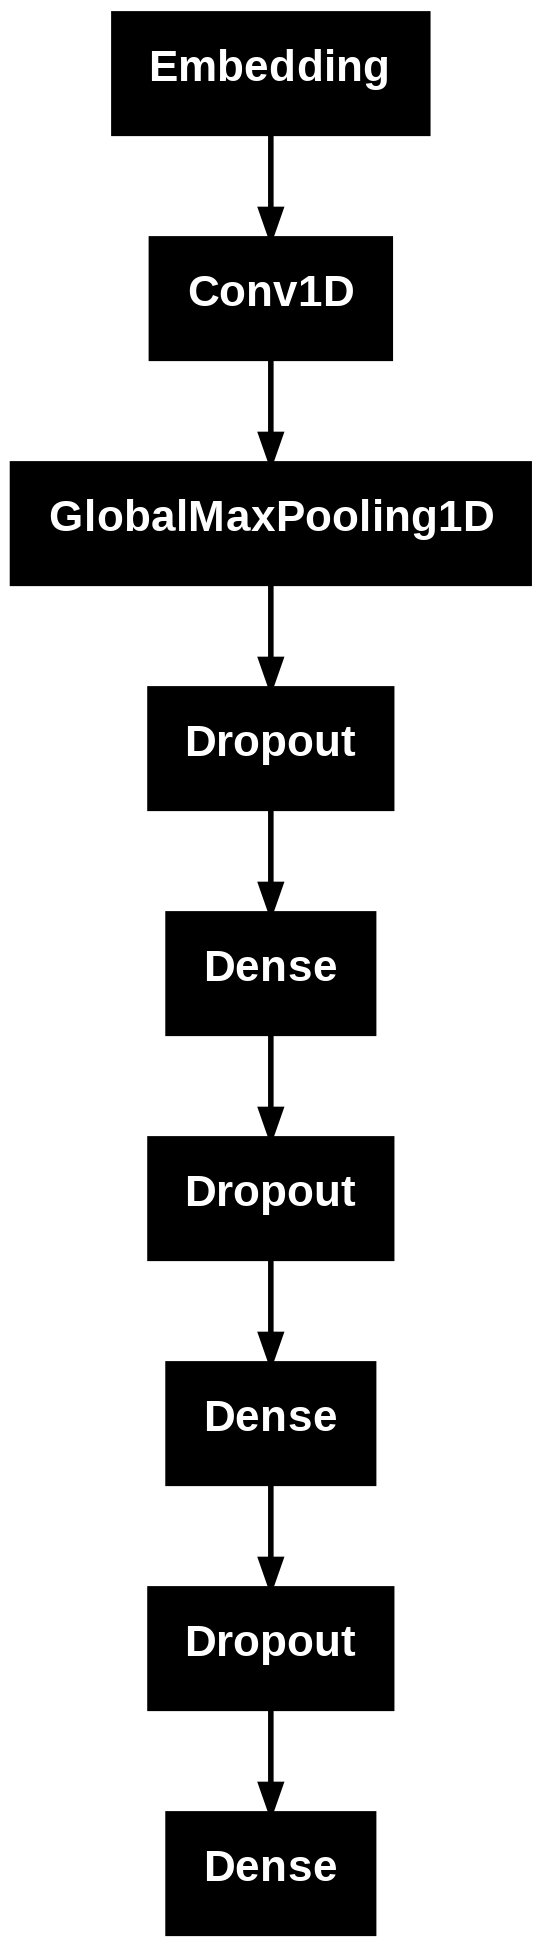

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import time
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


# Model parameters (define these first!)
MAX_NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 300
EMBEDDING_DIM = 100


# 1. Split off 20% as test set
X = df['clean_text'].values
y = df['label'].values
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Split remaining 80% into train and validation sets (e.g., 70/30 split of 80%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp
)

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# 4. Transform all sets
def texts_to_padded(texts):
    seq = tokenizer.texts_to_sequences(texts)
    return pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

X_train_pad = texts_to_padded(X_train)
X_val_pad = texts_to_padded(X_val)
X_test_pad = texts_to_padded(X_test)

# Model definitions
def create_lstm_model(vocab_size):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(32)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.build(input_shape=(None, MAX_SEQUENCE_LENGTH))
    return model

def create_cnn_model(vocab_size):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.build(input_shape=(None, MAX_SEQUENCE_LENGTH))
    return model


vocab_size = len(tokenizer.word_index) + 1
# Build and compile models
lstm_model = create_lstm_model(vocab_size)
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

cnn_model = create_cnn_model(vocab_size)
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

print("\nLSTM Model Summary:")
lstm_model.summary()
plot_model(lstm_model)

print("\nCNN Model Summary:")
cnn_model.summary()
plot_model(cnn_model)


In [9]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(25025,) (8938,)
(25025,) (8938,)


## Model Training CNN and LSTM

In [10]:
def train_model(model, X_train, y_train, X_val, y_val, model_name):
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    callbacks = [
        EarlyStopping(patience=2, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-7, verbose=1)
    ]
    print(f"\nTraining {model_name} model...")
    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )
    training_time = time.time() - start_time
    return history, training_time

# Example for LSTM and CNN (assuming you have X_train, X_test, y_train, y_test ready)
results = {}



models_data = {
    'LSTM': {'model': lstm_model, 'data': (X_train_pad, X_val_pad, y_train, y_val)},
    'CNN': {'model': cnn_model, 'data': (X_train_pad, X_val_pad, y_train, y_val)},
}



## START TRAINING
for name, model_info in models_data.items():
    print(f"\n{'='*60}")
    print(f"Training {name} model...")
    print(f"{'='*60}")

    model = model_info['model']
    X_train_curr, X_test_curr, y_train_curr, y_test_curr = model_info['data']

    history, training_time = train_model(model, X_train_curr, y_train_curr, X_test_curr, y_test_curr, name)

    # Evaluate
    test_loss, test_accuracy = model.evaluate(X_test_curr, y_test_curr, verbose=0)
    y_pred = (model.predict(X_test_curr) > 0.5).astype(int)

    results[name] = {
        'accuracy': test_accuracy,
        'training_time': training_time,
        'history': history,
        'predictions': y_pred,
        'model': model,
        'y_test': y_test_curr
    }

    print(f"\n{name} Results:")
    print(f"  Accuracy: {test_accuracy:.4f}")
    print(f"  Training Time: {training_time:.2f} seconds")




Training LSTM model...

Training LSTM model...
Epoch 1/20
783/783 ━━━━━━━━━━━━━━━━━━━━ 53s 59ms/step - accuracy: 0.9497 - loss: 0.1166 - val_accuracy: 0.9980 - val_loss: 0.0088 - learning_rate: 0.0010
Epoch 2/20
783/783 ━━━━━━━━━━━━━━━━━━━━ 74s 53ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 0.9985 - val_loss: 0.0107 - learning_rate: 0.0010
Epoch 3/20
783/783 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9998 - loss: 7.9853e-04 - val_accuracy: 0.9978 - val_loss: 0.0186 - learning_rate: 0.0010
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.
336/336 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step

LSTM Results:
  Accuracy: 0.9980
  Training Time: 167.62 seconds

Training CNN model...

Training CNN model...
Epoch 1/20
783/783 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.8874 - loss: 0.2175 - val_accuracy: 0.9964 - val_loss: 0.0143 - learning_rate: 0.0010
Epoch 2/20
783/783 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9982 - loss: 0.0070 - val_ac

## Model Results

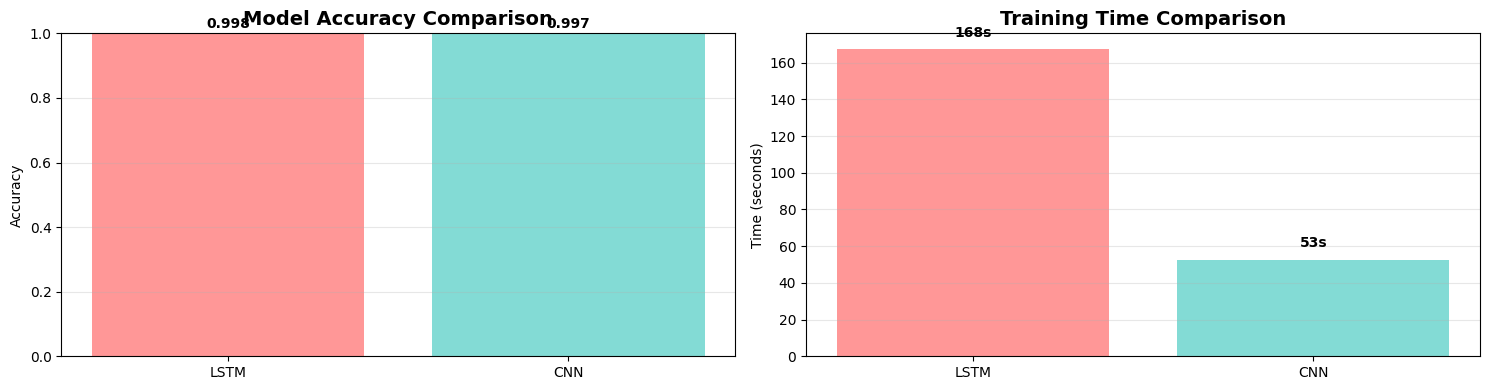

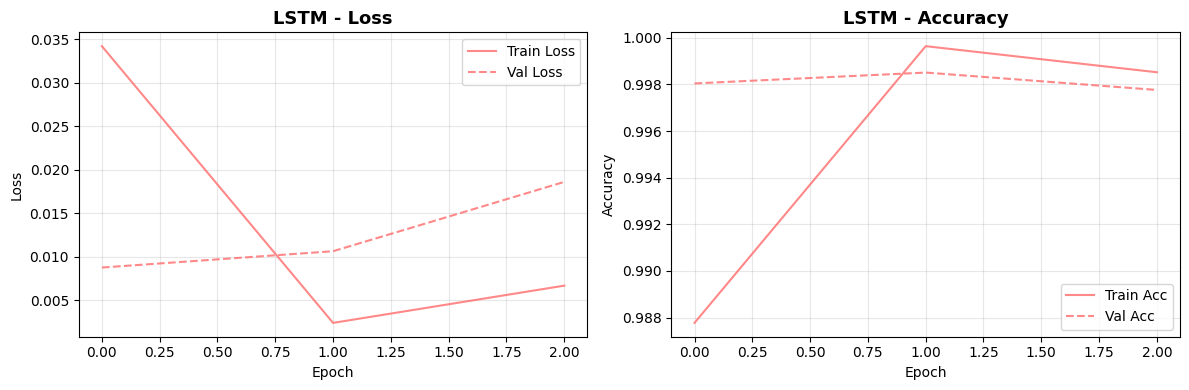

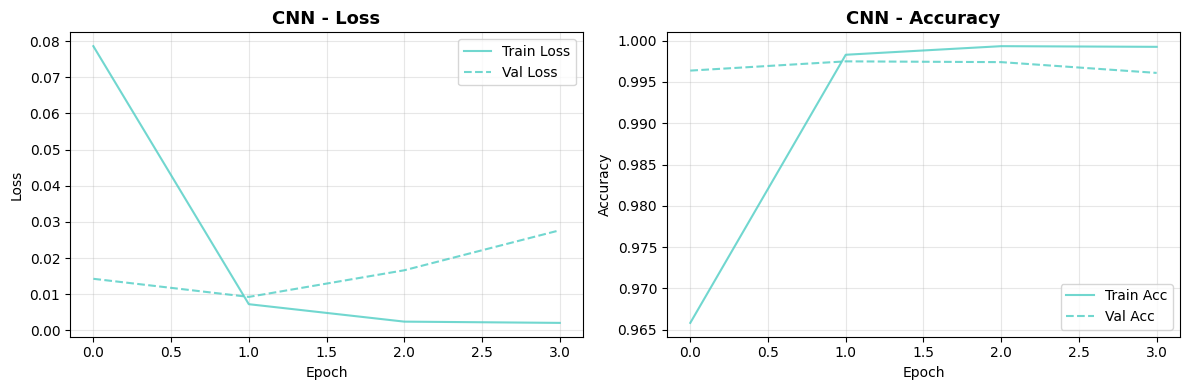


FINAL MODEL COMPARISON
LSTM:
  Accuracy: 0.9980
  Training Time: 167.62 seconds

CNN:
  Accuracy: 0.9975
  Training Time: 52.74 seconds


LSTM Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      5635
        True       1.00      1.00      1.00      5091

    accuracy                           1.00     10726
   macro avg       1.00      1.00      1.00     10726
weighted avg       1.00      1.00      1.00     10726



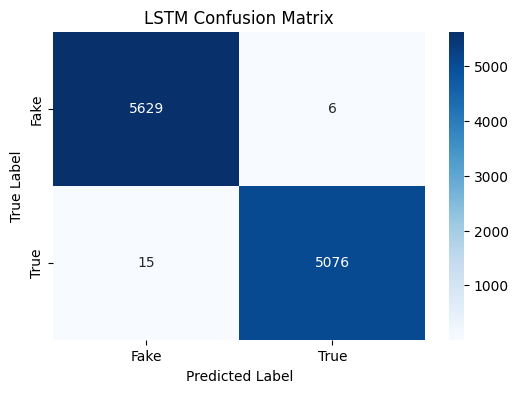


CNN Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      5635
        True       1.00      1.00      1.00      5091

    accuracy                           1.00     10726
   macro avg       1.00      1.00      1.00     10726
weighted avg       1.00      1.00      1.00     10726



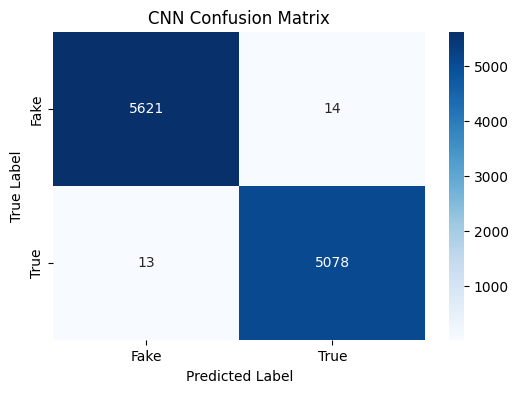

In [39]:
# Create comparison charts
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# 1. Accuracy Comparison
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

axes[0].bar(model_names, accuracies, color=colors, alpha=0.7)
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Training Time Comparison
training_times = [results[name]['training_time'] for name in model_names]
axes[1].bar(model_names, training_times, color=colors, alpha=0.7)
axes[1].set_title('Training Time Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Time (seconds)')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(training_times):
    axes[1].text(i, v + 5, f'{v:.0f}s', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 3. Training History (Loss & Accuracy) for each model
for i, name in enumerate(model_names):
    history = results[name]['history']
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    # Loss plot
    axs[0].plot(history.history['loss'], label='Train Loss', color=colors[i], alpha=0.8)
    axs[0].plot(history.history['val_loss'], label='Val Loss', color=colors[i], alpha=0.8, linestyle='--')
    axs[0].set_title(f'{name} - Loss', fontsize=13, fontweight='bold')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid(alpha=0.3)

    # Accuracy plot
    axs[1].plot(history.history['accuracy'], label='Train Acc', color=colors[i], alpha=0.8)
    axs[1].plot(history.history['val_accuracy'], label='Val Acc', color=colors[i], alpha=0.8, linestyle='--')
    axs[1].set_title(f'{name} - Accuracy', fontsize=13, fontweight='bold')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    axs[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

# Print final comparison
print(f"\n{'='*60}")
print("FINAL MODEL COMPARISON")
print(f"{'='*60}")
for name in model_names:
    print(f"{name}:")
    print(f"  Accuracy: {results[name]['accuracy']:.4f}")
    print(f"  Training Time: {results[name]['training_time']:.2f} seconds")
    print()

# Detailed classification reports
for name in model_names:
    print(f"\n{name} Classification Report:")
    print(classification_report(results[name]['y_test'], results[name]['predictions'],
                               target_names=['Fake', 'True']))

    # Confusion Matrix
    cm = confusion_matrix(results[name]['y_test'], results[name]['predictions'])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fake', 'True'],
                yticklabels=['Fake', 'True'])
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

## Evaluation on Test Data Set

Here we are checking accuracy of both models against the test dataset that we have kept a side.


Evaluating LSTM on Test Set
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
Test Loss: 0.0061
Test Accuracy: 0.9988

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4696
        True       1.00      1.00      1.00      4242

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



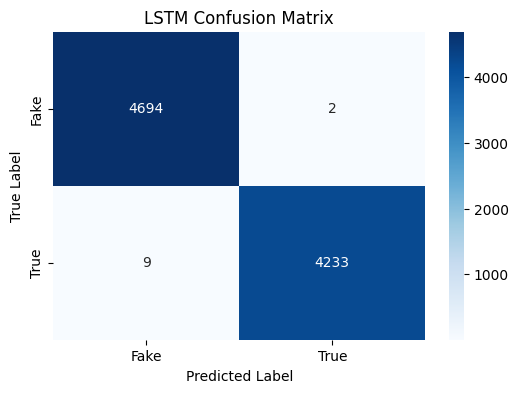


Evaluating CNN on Test Set
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Loss: 0.0058
Test Accuracy: 0.9983

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4696
        True       1.00      1.00      1.00      4242

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



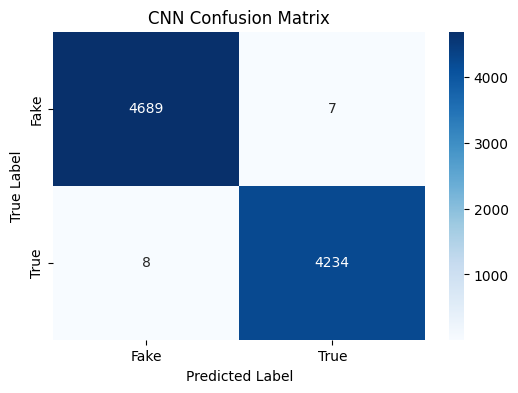

In [22]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def evaluate_on_test(model, X_test, y_test, model_name="Model"):
    """
    Evaluates a trained Keras model on the test set and prints metrics.
    """
    print(f"\n{'='*60}")
    print(f"Evaluating {model_name} on Test Set")
    print(f"{'='*60}")

    # Predict probabilities and classes
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Evaluate loss and accuracy
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Fake', 'True']))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Return results for further analysis if needed
    return {
        'loss': test_loss,
        'accuracy': test_accuracy,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'confusion_matrix': cm
    }

# Example usage:
results_lstm = evaluate_on_test(lstm_model, X_test_pad, y_test, model_name="LSTM")
results_cnn = evaluate_on_test(cnn_model, X_test_pad, y_test, model_name="CNN")


# Hyperparameter Tuning

Although our both models worked really well, we can do some advanced hyperparameter tuning for our LSTM model.


In [42]:
from tensorflow import keras


def build_lstm_model(lstm_units=64, dropout_rate=0.3, learning_rate=0.001, embedding_dim=100):
    model = keras.Sequential([
        keras.layers.Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            input_length=MAX_SEQUENCE_LENGTH
        ),
        keras.layers.Bidirectional(
            keras.layers.LSTM(lstm_units, return_sequences=True)
        ),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Bidirectional(
            keras.layers.LSTM(lstm_units // 2)
        ),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(lstm_units, activation='relu'),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


def manual_grid_search():
    # Define parameter combinations
    param_combinations = [
        {'lstm_units': 32, 'dropout_rate': 0.3, 'learning_rate': 0.001},
        {'lstm_units': 64, 'dropout_rate': 0.3, 'learning_rate': 0.001},
    ]

    best_score = 0
    best_params = None
    best_model = None

    for params in param_combinations:
        print(f"\nTrying parameters: {params}")

        # Build model with current parameters
        model = build_lstm_model(**params)

        # Train model
        history = model.fit(
            X_train_pad, y_train,
            validation_data=(X_val_pad, y_val),
            epochs=5,
            batch_size=32,
            verbose=0
        )

        # Get best validation accuracy
        val_accuracy = max(history.history['val_accuracy'])

        if val_accuracy > best_score:
            best_score = val_accuracy
            best_params = params
            best_model = model

        print(f"Validation accuracy: {val_accuracy:.4f}")

    print(f"\nBest parameters: {best_params}")
    print(f"Best validation accuracy: {best_score:.4f}")

    return best_model, best_params

# Run manual grid search
best_lstm_model, best_params = manual_grid_search()


Trying parameters: {'lstm_units': 32, 'dropout_rate': 0.3, 'learning_rate': 0.001}
Validation accuracy: 0.9983

Trying parameters: {'lstm_units': 64, 'dropout_rate': 0.3, 'learning_rate': 0.001}
Validation accuracy: 0.9989

Best parameters: {'lstm_units': 64, 'dropout_rate': 0.3, 'learning_rate': 0.001}
Best validation accuracy: 0.9989


## Final Conclusion

In this project we demonstrated the how deep learning techniques can be used to detect Fake News. We used two different model architectures RNN and CNN and both worked equally good. Although I do have some reservations about my results as it is very hard to achieve 99% accuracy.

### Model Comparison

- Accuracy of both models turn out be similar but training time for RNN was significantly higher.
- CNN model was really fast to train as compared to RNN model because it uses less parameters because of convolution layers.
- I do think there is some issue with my train, test and validation data split and model feeding which is resulting is very high accuracy.

### Future Work
- More robust tokenization mechanisms. 
- It would be interesting to Use Bert model to create embeddings which can make models quiet robust.
- Also we can use basic Bert model from hugging face and build on top of that model to detect the fake news which in my opinion can be more.

## Test Function to Test Models output

I created this test function to use my base models to detect whether an article is fake or not. It takes article text as input and return `Prediction: Fake News (Probability of True: 0.0002)`

In [43]:
# prompt: Can you quickly create a function where I will give some text and model as inputs and it will return whether its fake news or not

import time
from tensorflow.keras.utils import plot_model

def predict_fake_news(text, model, tokenizer, max_seq_length=MAX_SEQUENCE_LENGTH):
    """
    Predicts whether a given text is fake news or not using a trained model.

    Args:
        text (str): The input text to classify.
        model: The trained Keras model (LSTM or CNN).
        tokenizer: The Keras Tokenizer used for text preprocessing.
        max_seq_length (int): The maximum sequence length used during training.

    Returns:
        str: "Fake News" or "True News" based on the prediction.
        float: The predicted probability for True News.
    """
    # Clean the input text
    cleaned_text = clean_text(text)

    # Convert text to sequence
    sequence = tokenizer.texts_to_sequences([cleaned_text])

    # Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_seq_length, padding='post', truncating='post')

    # Make prediction
    prediction = model.predict(padded_sequence)

    # Get the probability of True News
    true_news_prob = prediction[0][0]

    # Determine the label based on probability (threshold 0.5)
    if true_news_prob > 0.5:
        return "True News", true_news_prob
    else:
        return "Fake News", true_news_prob

# Example usage:
# Assuming 'lstm_model' and 'tokenizer' are already trained and defined
new_text_fake = "In a groundbreaking event that has captivated the world, an alien being landed on Earth yesterday, marking the first confirmed extraterrestrial contact in human history. This unprecedented incident took place in a remote area of the Nevada desert, where witnesses reported seeing a shimmering craft descend from the sky before a creature emerged. Scientists, government officials, and curious citizens alike are grappling with the implications of this encounter, which could redefine our understanding of life beyond Earth. According to eyewitness accounts, the alien, described as approximately seven feet tall with a luminous, translucent skin and oversized eyes, stepped out of a spacecraft that appeared to be composed of an unfamiliar metallic substance. “It was unlike anything I had ever seen. It moved with a grace that felt almost otherworldly,” said Jessica Taylor, a hiker who was in the vicinity at the time of the landing. “I felt a mixture of fear and awe; it was as if I was witnessing a miracle."
prediction_fake, prob_fake = predict_fake_news(new_text_fake, lstm_model, tokenizer)
print(f"Text: {new_text_fake}")
print(f"Prediction: {prediction_fake} (Probability of True: {prob_fake:.4f})")


# Assuming 'lstm_model' and 'tokenizer' are already trained and defined
new_text_fake = "In a shocking turn of events that has left Earthlings both starstruck and scratching their heads, a Mars rover has reportedly captured candid photos of a famous celebrity vacationing on the Red Planet. Sources say the otherworldly getaway was anything but low-key, with the rover snapping a series of selfies featuring the star striking poses next to Martian rocks and dust storms"
prediction_fake, prob_fake = predict_fake_news(new_text_fake, lstm_model, tokenizer)
print(f"Text: {new_text_fake}")
print(f"Prediction: {prediction_fake} (Probability of True: {prob_fake:.4f})")

new_text_true = "SEOUL (Reuters) - South Korea s defense ministry said in a parliament hearing on Monday it was still seeing signs that North Korea planned to stage more ballistic missile launches, possibly including an intercontinental ballistic missile.  We have continued to see signs of possibly more ballistic missile launches. We also forecast North Korea could fire an intercontinental ballistic missile,  said Chang Kyung-soo, a defense ministry official.  The defense ministry was called by parliament on Monday to answer questions about North Korea s sixth and largest nuclear test that was carried out a day earlier."
prediction_true, prob_true = predict_fake_news(new_text_true, cnn_model, tokenizer)
print(f"\nText: {new_text_true}")
print(f"Prediction: {prediction_true} (Probability of True: {prob_true:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Text: In a groundbreaking event that has captivated the world, an alien being landed on Earth yesterday, marking the first confirmed extraterrestrial contact in human history. This unprecedented incident took place in a remote area of the Nevada desert, where witnesses reported seeing a shimmering craft descend from the sky before a creature emerged. Scientists, government officials, and curious citizens alike are grappling with the implications of this encounter, which could redefine our understanding of life beyond Earth. According to eyewitness accounts, the alien, described as approximately seven feet tall with a luminous, translucent skin and oversized eyes, stepped out of a spacecraft that appeared to be composed of an unfamiliar metallic substance. “It was unlike anything I had ever seen. It moved with a grace that felt almost otherworldly,” said Jessica Taylor, a hiker who was in the vicinity at the time of the landing. “I felt a mixture of